# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [6]:
# Shape
df_dsa.shape

(9700, 11)

In [7]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [35]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [36]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Desconto


In [37]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido               0
Data_Pedido             0
ID_Cliente              0
Segmento                0
Pais                    0
Cidade                  0
Estado                  0
ID_Produto              0
Categoria               0
SubCategoria            0
Valor_Venda             0
Desconto                0
Valor_Venda_Desconto    0
dtype: int64

In [38]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [39]:
#Filtra o dataframe com os registros da categoria 'Office Supplies'
df2 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
df2.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Desconto
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620,0.1,13.1580
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368,0.1,20.1312
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280,0.1,6.5520
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504,0.1,16.6536
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900,0.1,103.4100


In [40]:
#Agrupar por cidade e calcular total de valor de vendas
total_venda_OS = df2.groupby('Cidade')['Valor_Venda'].sum().reset_index()
total_venda_OS

,Cidade,Valor_Venda
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,1107.646
3,Albuquerque,943.122
4,Alexandria,4879.790
...,...,...
475,Woonsocket,142.590
476,Yonkers,665.964
477,York,395.920
478,Yucaipa,50.800


In [41]:
#Achar a cidade com maior número de vendas
cidade_maior_venda = total_venda_OS.sort_values('Valor_Venda', ascending=False).head(1)
print(cidade_maior_venda)

            Cidade  Valor_Venda
295  New York City    68362.814


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [42]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'],  dayfirst=True)

In [43]:
df3 = df_dsa.sort_values('Data_Pedido')

In [44]:
resumo_vendas = df3.groupby('Data_Pedido')['Valor_Venda'].sum()
resumo_vendas

Data_Pedido
2015-01-03      16.4480
2015-01-04     288.0600
2015-01-05      19.5360
2015-01-06    4407.1000
2015-01-07      87.1580
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Valor_Venda, Length: 1226, dtype: float64

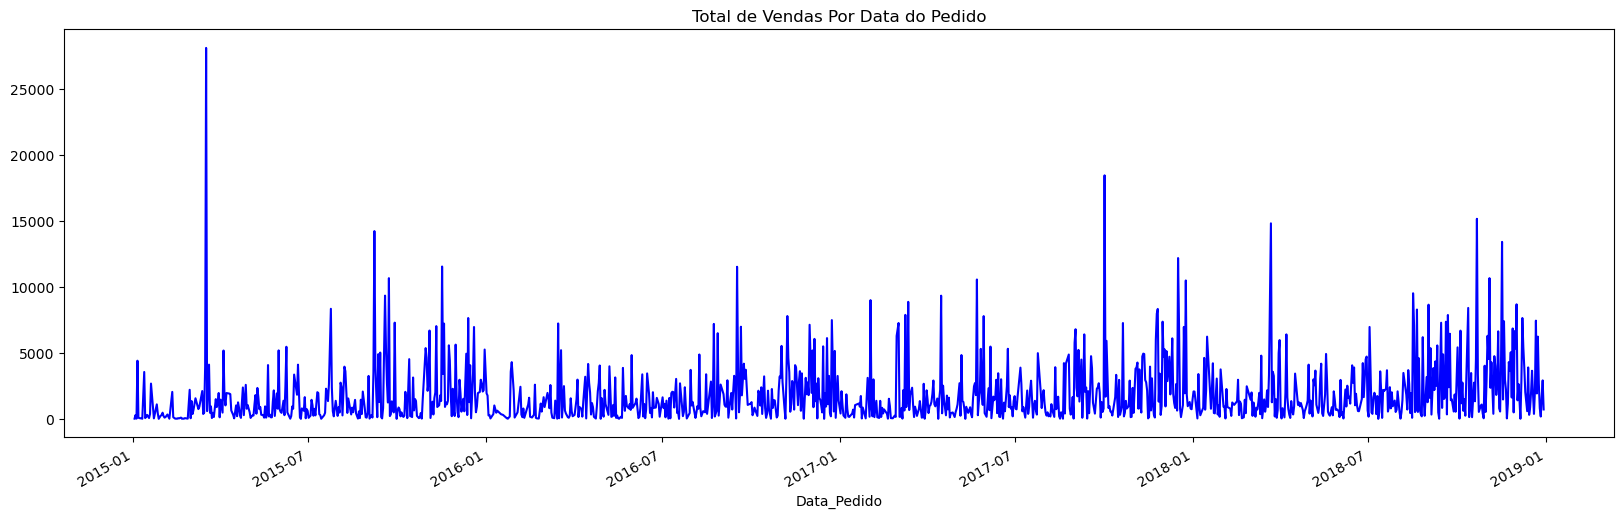

In [45]:
plt.figure(figsize = (20, 6))
resumo_vendas.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [46]:
total_por_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
total_por_estado.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


In [47]:
qtd_estados = df_dsa['Estado'].nunique()
print(f"Quantidade de estados diferentes: {qtd_estados}")

Quantidade de estados diferentes: 49


<Figure size 1600x600 with 0 Axes>

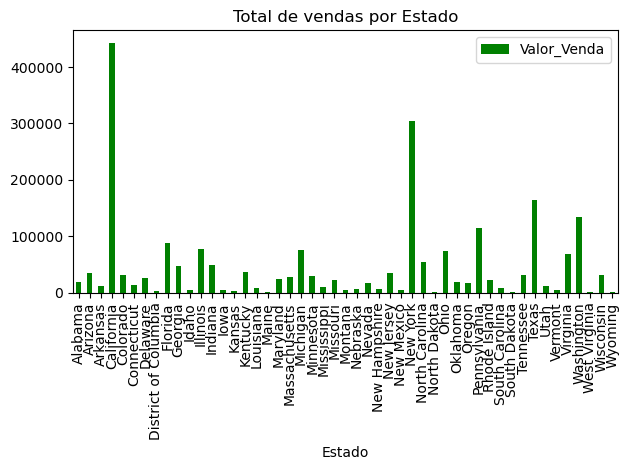

In [48]:
plt.figure(figsize = (16, 6))
total_por_estado.plot.bar(x = 'Estado', y = 'Valor_Venda', color = 'green')
plt.title('Total de vendas por Estado')
plt.tight_layout()
plt.show()

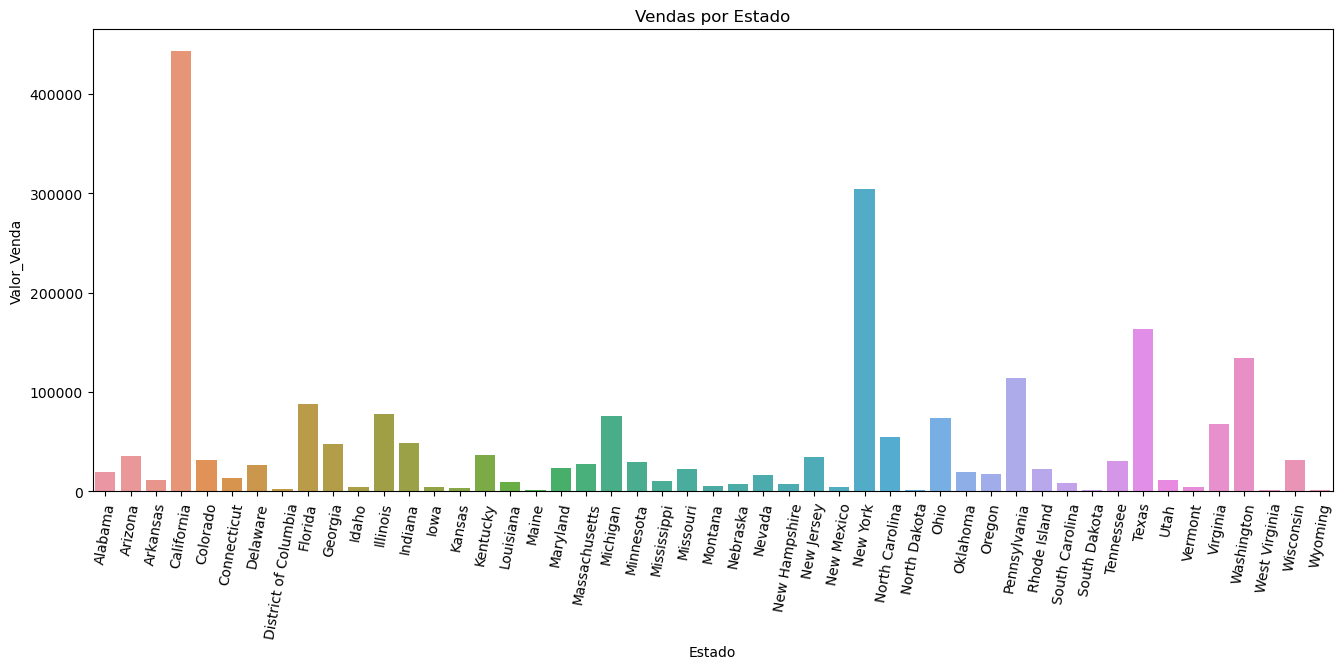

In [49]:
#Plot
plt.figure(figsize = (16,6))
sns.barplot(data = total_por_estado,
           y = 'Valor_Venda',
           x = 'Estado').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80) 
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [50]:
total_por_cidade = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index()
total_por_cidade

,Cidade,Valor_Venda
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
523,Woonsocket,195.550
524,Yonkers,7657.666
525,York,817.978
526,Yucaipa,50.800


In [51]:
df4 =  total_por_cidade.sort_values('Valor_Venda', ascending=False).head(10)
df4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


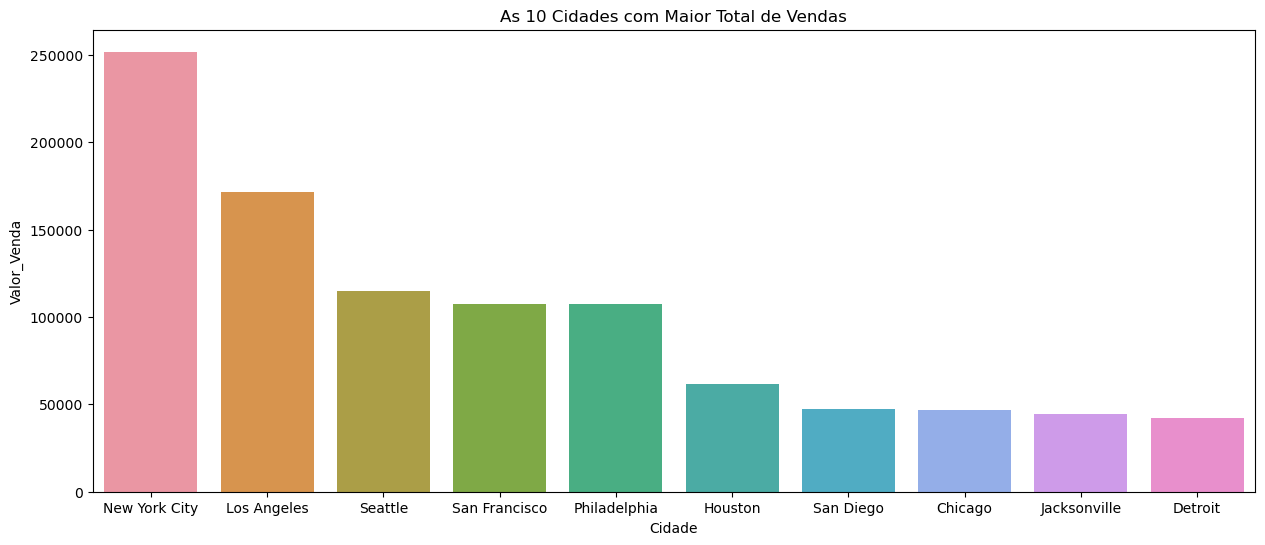

In [52]:
plt.figure(figsize = (15, 6))
sns.set_palette('icefire')
sns.barplot(data = df4, x = 'Cidade', y = 'Valor_Venda').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [53]:
total_por_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index()
total_por_segmento

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


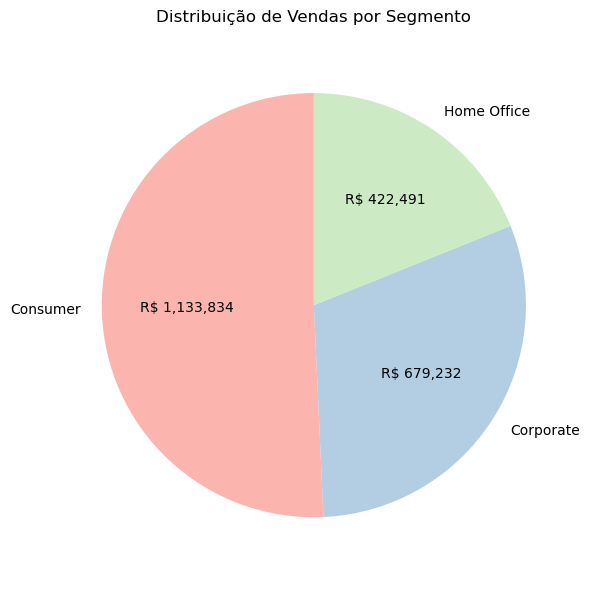

In [54]:
cores = sns.color_palette("Pastel1", n_colors=3)
labels = total_por_segmento['Segmento']
valores = total_por_segmento['Valor_Venda']


# Gráfico de pizza com valores absolutos
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=labels, colors = cores,
        autopct=lambda p: f'R$ {int(p * sum(valores) / 100):,}',
        startangle=90)
plt.title('Distribuição de Vendas por Segmento')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [55]:
#Criar uma nova coluna 'Ano'
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

df_dsa

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Desconto,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1,20.54700,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1,48.88800,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1,177.09840,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1,3.25800,2017


In [56]:
#Total de Vendas Por Ano e Segmento
df5 = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
df5

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [57]:
# Separar quantas vendas são maiores que 1000 e receberiam 15% de desconto
df7 = df_dsa[df_dsa['Valor_Venda'] > 1000 ]
df7

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Desconto,Ano
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,0.15,1450.2564,2015
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,0.15,887.9355,2016
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,0.15,2620.9155,2016
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,0.15,932.9124,2017
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,0.15,875.4575,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,0.15,1384.4970,2015
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,0.15,3652.9974,2016
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,0.15,2895.6644,2017
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,0.15,2570.3388,2017


In [58]:
#Quantidade total de vendas com 15% de desconto
qtd_15 = df7.shape[0]
print(qtd_15)

457


In [59]:
# Separar quantas vendas são menores que 1000 e receberiam 10% de desconto
df8 = df_dsa[df_dsa['Valor_Venda'] < 1000 ]
df8

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Desconto,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,0.1,20.54700,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,0.1,48.88800,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,0.1,177.09840,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,0.1,3.25800,2017


In [60]:
#Quantidade total de vendas com 10% de desconto
qtd_10 = df8.shape[0]
print(qtd_10)

9243


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [61]:
#Criar uma nova coluna de acordo com a regra 
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

In [62]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Desconto,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120,2016


In [63]:
#Criar uma coluna calculando o valor de venda menos o desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])

In [64]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Desconto,Valor_Venda_Desconto,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1,235.76400,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1,658.74600,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1,13.15800,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1,861.81975,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1,20.13120,2016


In [65]:
#Filtrar as vendas antes do desconto de 15%
vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

In [66]:
#Filtrar vendas depois do desconto
vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [67]:
#Calcular média das vendas antes do desconto
media_vendas_antes_desconto = vendas_antes_desconto.mean()

In [68]:
#Calcular média das vendas depois do desconto
media_vendas_depois_desconto = vendas_depois_desconto.mean()

In [69]:
print("Média das vendas antes do desconto de 15%:", round(media_vendas_antes_desconto, 2))

Média das vendas antes do desconto de 15%: 2116.81


In [70]:
print("Média das vendas depois do desconto de 15%:", round(media_vendas_depois_desconto, 2))

Média das vendas depois do desconto de 15%: 1799.29


# Fim